<a href="https://www.kaggle.com/code/meeratif/titanic-ml-model-regression?scriptVersionId=108465667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
train_file = pd.read_csv('../input/titanic/train.csv')
test_file = pd.read_csv('../input/titanic/test.csv')
sub_file = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
train_file.shape

(891, 12)

In [4]:
train_file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_file.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


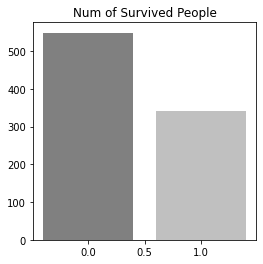

In [9]:
plt.figure(figsize=(4,4))
plt.bar(list(train_file['Survived'].value_counts().keys()), list(train_file['Survived'].value_counts()), color=('grey', 'silver'))
plt.title("Num of Survived People")
plt.show()

In [10]:
train_file['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
sum(train_file['Survived'].isnull())

0

In [12]:
bl_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

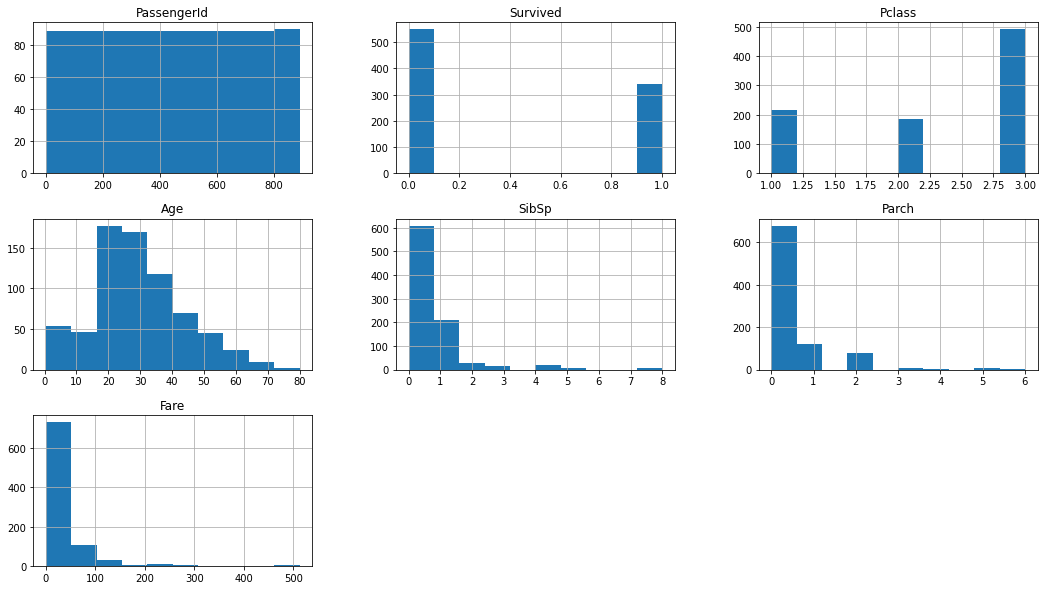

In [13]:
train_file.hist(figsize=(18, 10))
plt.show()

In [14]:
train_file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

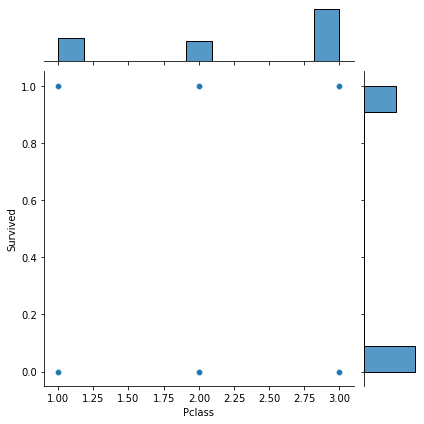

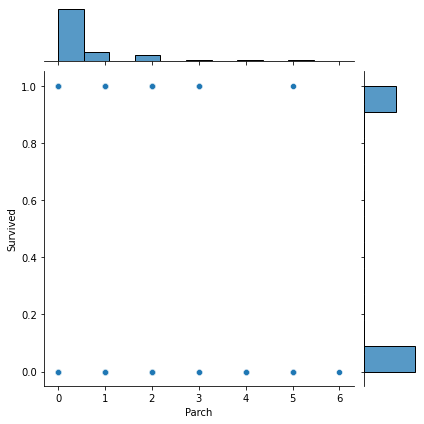

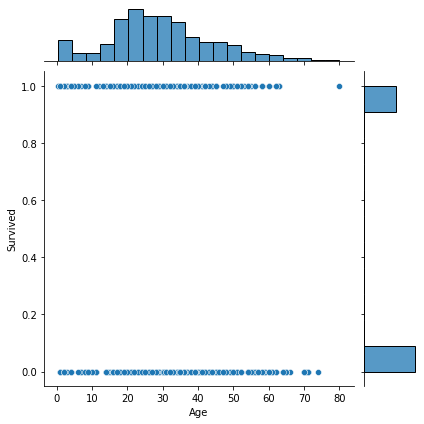

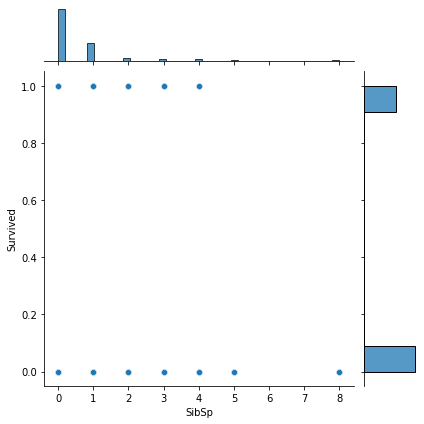

In [15]:
sns.jointplot(data=train_file, x='Pclass', y='Survived')
sns.jointplot(data=train_file, x='Parch', y='Survived')
sns.jointplot(data=train_file, x='Age', y='Survived')
sns.jointplot(data=train_file, x='SibSp', y='Survived')

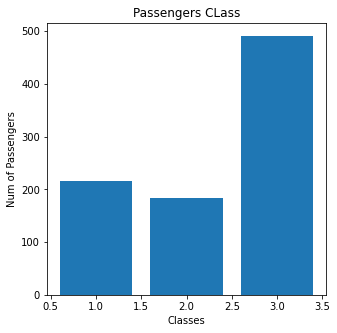

In [16]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Pclass'].value_counts().keys()), list(train_file['Pclass'].value_counts()))
plt.title("Passengers CLass")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()

In [17]:
train_file['Pclass'].value_counts() #Passengers Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

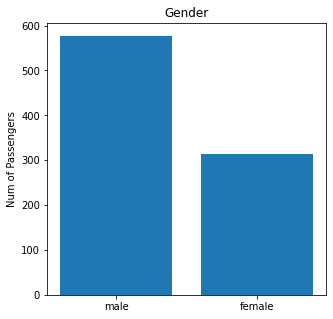

In [18]:
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Sex'].value_counts().keys()), list(train_file['Sex'].value_counts()))
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

In [19]:
train_file['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

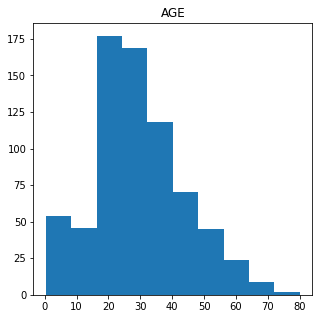

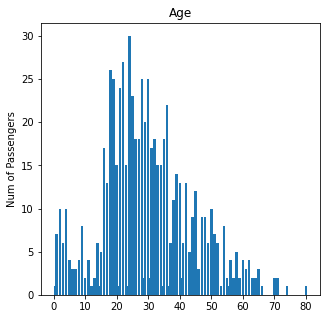

In [20]:
#Historgram
plt.figure(figsize=(5,5))
plt.hist(train_file['Age'])
plt.title("AGE")
plt.show()

#Bar
plt.figure(figsize=(5,5))
plt.bar(list(train_file['Age'].value_counts().keys()), list(train_file['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

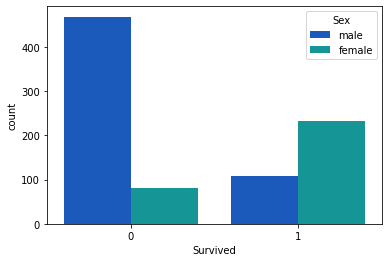

In [21]:
sns.countplot(x="Survived", hue='Sex', data=train_file, palette="winter")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

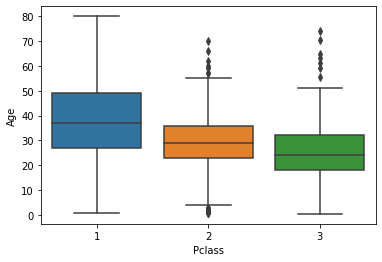

In [22]:
sns.boxplot(x="Pclass", y="Age", data=train_file)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

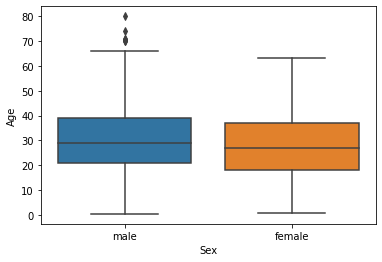

In [23]:
sns.boxplot(x="Sex", y="Age", data=train_file)

In [24]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

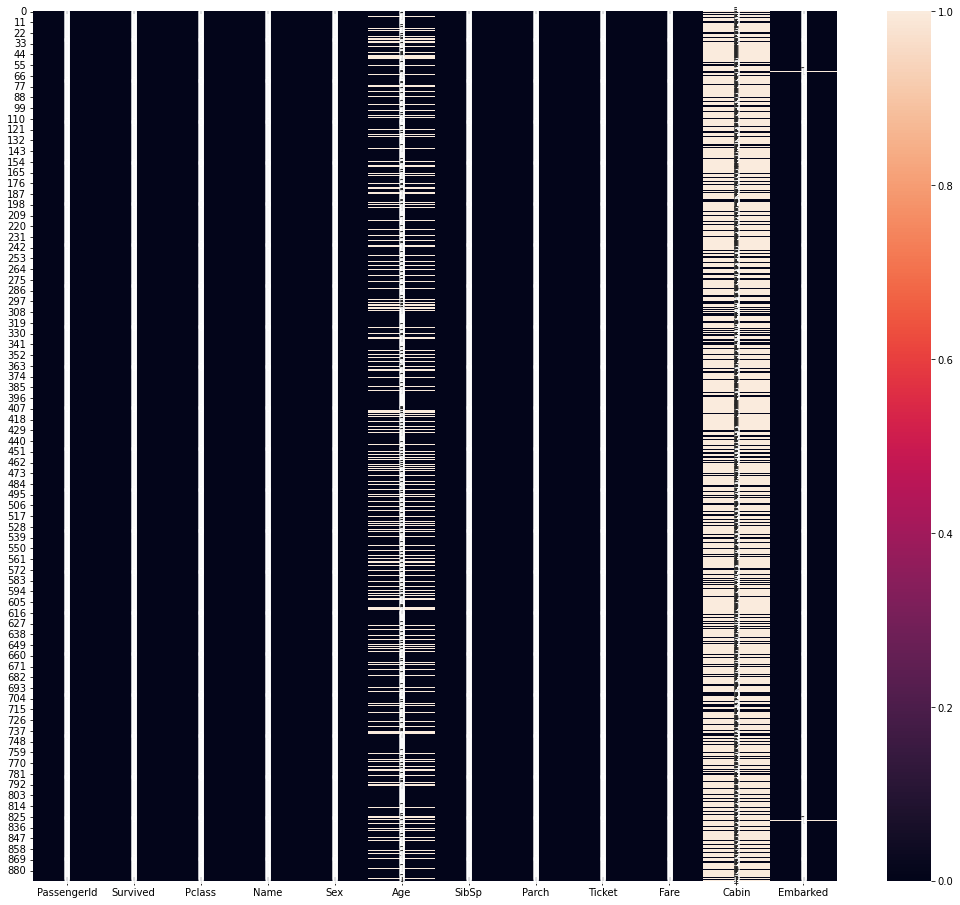

In [25]:
plt.figure(figsize=(18,16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

In [26]:
train_file['Age'] = train_file['Age'].fillna(train_file['Age'].mean())

In [27]:

train_file['Age'].isnull().sum()

0

In [28]:
train_file = train_file.drop('Cabin', axis=True)

In [29]:
train_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


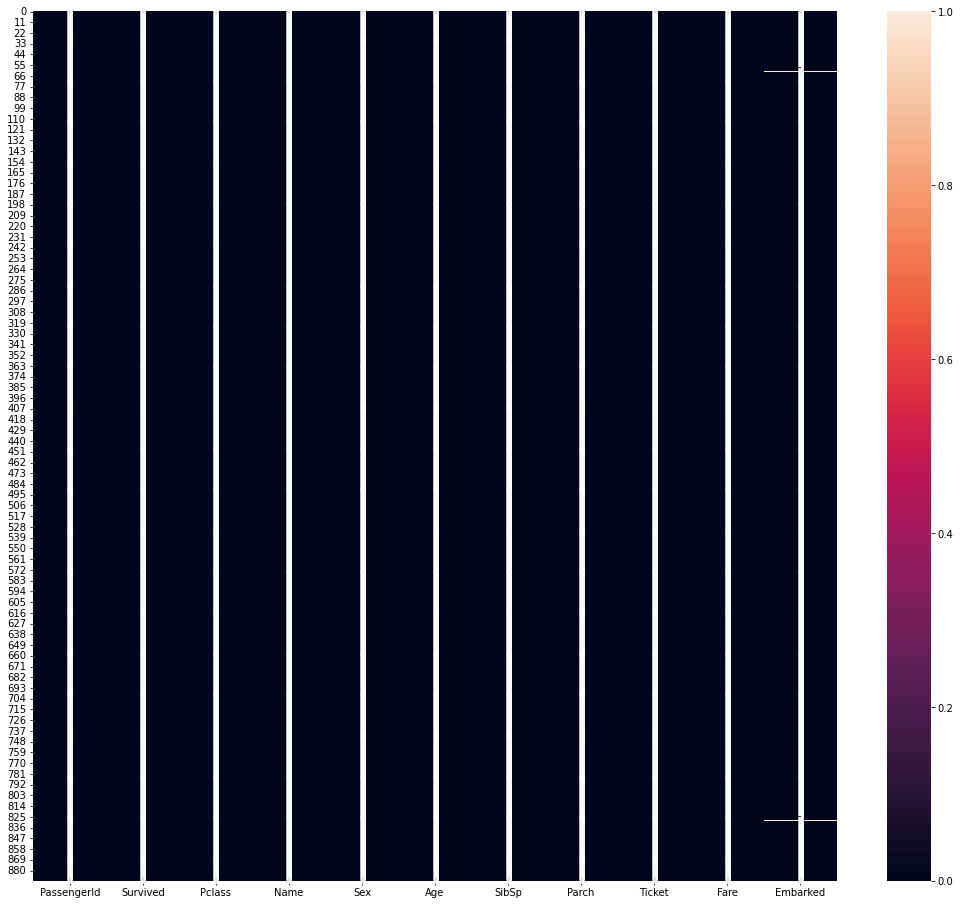

In [30]:
plt.figure(figsize=(18,16))
sns.heatmap(train_file.isnull(), annot=True)
plt.show()

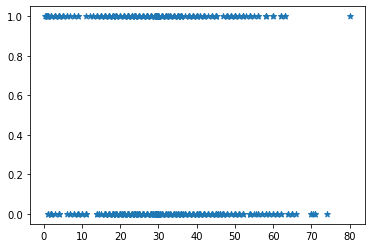

In [31]:
plt.scatter(train_file['Age'], train_file['Survived'], marker="*")

In [32]:
bl_col = train_file.select_dtypes(include=('boolean'))
int_col = train_file.select_dtypes(include=('int')).columns
str_col = train_file.select_dtypes(include=('object')).columns

In [33]:
str_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [34]:
l_e = LabelEncoder()

In [35]:
for col in str_col:
    train_file[col] = l_e.fit_transform(train_file[col].astype('str'))

In [36]:
x = train_file.drop(['Survived'], axis=True)

In [37]:
y = train_file[["Survived"]]

In [38]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.000000,1,0,523,7.2500,2
1,2,1,190,0,38.000000,1,0,596,71.2833,0
2,3,3,353,0,26.000000,0,0,669,7.9250,2
3,4,1,272,0,35.000000,1,0,49,53.1000,2
4,5,3,15,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0,0,101,13.0000,2
887,888,1,303,0,19.000000,0,0,14,30.0000,2
888,889,3,413,0,29.699118,1,2,675,23.4500,2
889,890,1,81,1,26.000000,0,0,8,30.0000,0


In [39]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [40]:
x.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013083
Pclass,-0.035144,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.157112
Name,-0.038559,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,-0.004557
Sex,0.042939,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.104057
Age,0.033207,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.022239
SibSp,-0.057527,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.066654
Parch,-0.001652,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.038322
Ticket,-0.056554,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.006041
Fare,0.012658,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.221226
Embarked,0.013083,0.157112,-0.004557,0.104057,-0.022239,0.066654,0.038322,-0.006041,-0.221226,1.000000


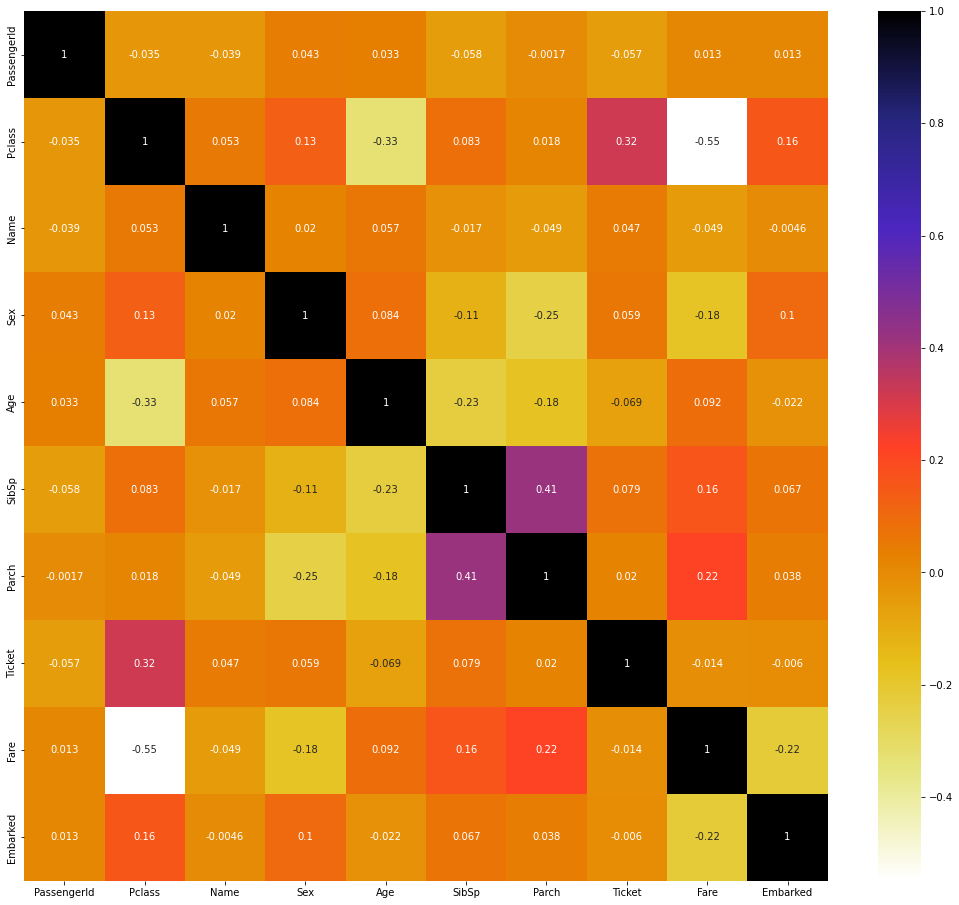

In [41]:
plt.figure(figsize=(18,16))
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

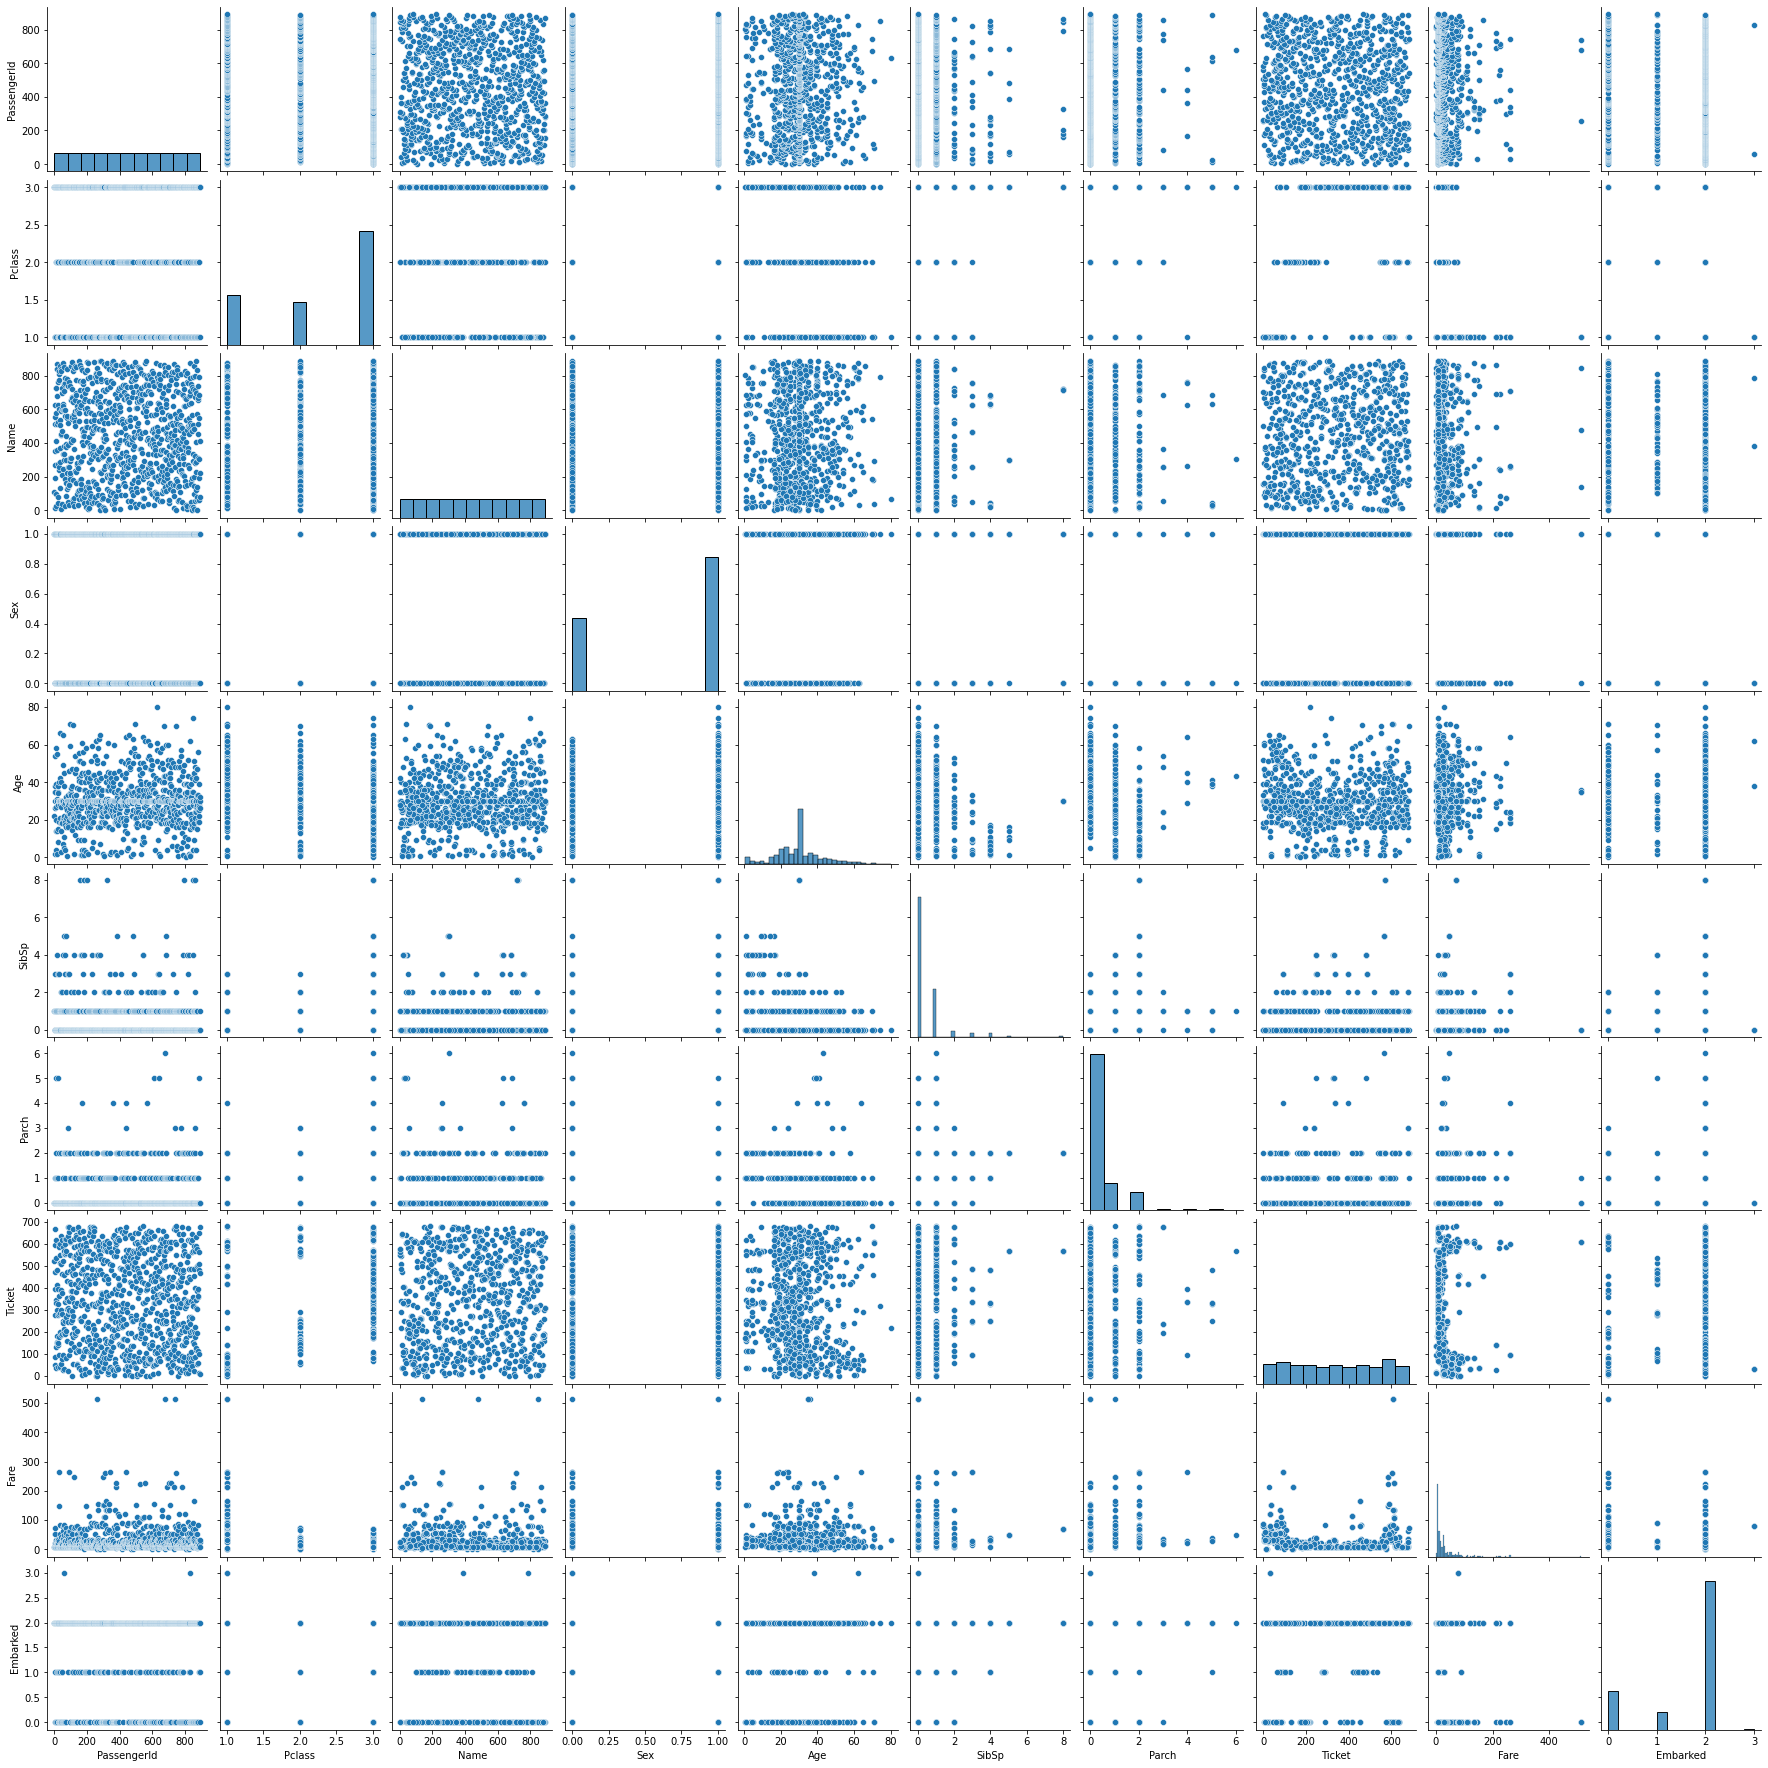

In [42]:
sns.pairplot(x)

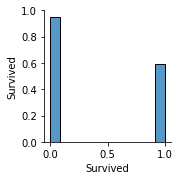

In [43]:
sns.pairplot(y)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=30)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(max_depth=6,
                            random_state=5)
rf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=6, random_state=5)

In [48]:
predy = rf.predict(x_test)

In [49]:
rf.score(x_test, y_test)

0.8212290502793296

In [50]:
sub = pd.DataFrame(train_file["PassengerId"])
sub["Survived"] = pd.DataFrame(predy)